# Futures Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of futures.)
    
    NOTE: pinkfish does not yet have full support for futures backtesting, and
    the futures data from yahoo finance isn't very good.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Investment Universe:  

Futures contracts cover these main asset classes:  
- Equities
- Interest rates
- Agricultural commodities
- Non-agricultural commodities
- Currencies

### FUTURES

https://finance.yahoo.com/commodities?.tsrc=fin-srch  
https://www.barchart.com/futures/contract-specifications/currencies

In [3]:
# symbol: (description, multiplier)


equities = {
    'ES=F':  ('E-Mini S&P 500 Futures', 50),
    'YM=F':  ('Mini Dow Jones Futures', 5),
    'NQ=F':  ('Nasdaq 100 Futures', 20),
}

interest_rates = {
    'ZB=F':  ('U.S. Treasury Bond Futures', 1000),
    'ZN=F':  ('10-Year T-Note Futures', 1000),
    'ZF=F':  ('Five-Year US Treasury Note Futures', 1000),
    'ZT=F':  ('2-Year T-Note Futures', 2000) 
}

# https://www.cmegroup.com/markets/agriculture.html#products
agricultural_commodities = {
# Grains
    'ZC=F':  ('Corn Futures', 5000),
    'KE=F':  ('KC HRW Wheat Futures', 5000),
    'ZS=F':  ('Soybean Futures', 50),
    'KE=F':  ('KC HRW Wheat Futures', 50),
    'ZR=F':  ('Rough Rice Futures', 2000),
    'ZM=F':  ('Soybean Meal Futures', 100),
    'ZL=F':  ('Soybean Oil Futures', 600),
    'GF=F':  ('Feeder Cattle Futures', 500),
    'HE=F':  ('Lean Hogs Futures', 400),
    'CC=F':  ('Cocoa Futures', 10),
    'KC=F':  ('Coffee Futures', 375),
    'CT=F':  ('Cotton Futures', 50000),
    'LBS=F':  ('Lumber Futures', 110),
     'SB=F':  ('Sugar #11 Futures', 1120)
}

non_agricultural_commodities = {
    'GC=F':  ('Gold Futures', 100),
    'SI=F':  ('Silver Futures', 5000),
    'PL=F':  ('Platinum Futures', 50),
    'HG=F':  ('Copper Futures', 25000),
    'PA=F':  ('Palladium Futures', 100),
    'CL=F':  ('Crude Oil Futures', 1000),
    'HO=F':  ('Heating Oil Futures', 42000),
    'NG=F':  ('Natural Gas Futures', 10000),
    'RB=F':  ('RBOB Gasoline Futures', 42000)
}

# https://www.cmegroup.com/markets/fx.html#products
currency_multiplier = 100
currencies = {
# G10
    'DX=F':  ('U.S. Dollar Index', currency_multiplier),
    '6E=F':  ('Euro FX Futures', currency_multiplier),
    '6J=F':  ('Japanese Yen Futures', currency_multiplier),
    '6A=F':  ('Australian Dollar Futures', currency_multiplier),
    '6B=F':  ('British Pound Futures', currency_multiplier),
    '6C=F':  ('Canadian Dollar Futures', currency_multiplier),
    '6S=F':  ('Swiss Franc Futures', currency_multiplier),
    '6N=F':  ('New Zealand Dollar Futures', currency_multiplier),   
}



futures = {**equities, **interest_rates, **agricultural_commodities,
                 **non_agricultural_commodities, **currencies}

ten_largest = ['ZN=F', 'ES=F', 'CL=F', 'GC=F', 'ZC=F', 'KC=F', 'CT=F', 'DX=F']

symbols = list(ten_largest)
#symbols = ['ES=F', 'GC=F', 'CL=F']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'sell_short' : False,
    'force_stock_market_calendar' : True,
    'margin' : 2,
    'sma_timeperiod_slow': 100,
    'sma_timeperiod_fast': 50,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed





View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2001-03-28,0,210.50,92,entry,LONG,ZC=F
1,2001-03-28,1,105.78,621,entry,LONG,ZN=F
2,2001-04-24,2,115.34,337,entry,LONG,DX=F
3,2001-04-25,3,194.50,92,exit,LONG,ZC=F
4,2001-05-25,4,277.90,60,entry,LONG,GC=F


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2001-03-28,210.50,2001-04-25,194.50,-16.00,-1472.00,92,-1472.00,LONG,ZC=F
1,2001-03-28,105.78,2001-05-25,102.94,-2.84,-1766.00,621,-3238.00,LONG,ZN=F
2,2001-04-24,115.34,2001-08-30,112.87,-2.47,-832.39,337,-4070.39,LONG,DX=F
3,2001-05-25,277.90,2002-01-03,278.20,0.30,18.00,60,-4052.39,LONG,GC=F
4,2001-06-21,26.56,2001-06-22,26.83,0.27,120.15,445,-3932.24,LONG,CL=F


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-23,482013.76,482013.76,482013.76,60,374259.76,1.00,X
2022-12-27,483147.76,483147.76,483147.76,60,374259.76,1.00,-
2022-12-28,482733.76,482733.76,482733.76,60,374259.76,1.00,-
2022-12-29,483429.76,483429.76,483429.76,60,374259.76,1.00,-
2022-12-30,484065.75,484065.75,484065.75,0,484065.75,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2001-03-28
end                                                    2022-12-30
beginning_balance                                          100000
ending_balance                                          484065.75
total_net_profit                                        384065.75
gross_profit                                            707034.52
gross_loss                                             -322968.77
profit_factor                                                2.19
return_on_initial_capital                                  384.07
annual_return_rate                                           7.52
trading_period                           21 years 9 months 2 days
pct_time_in_market                                          99.89
margin                                                          2
avg_leverage                                                 1.25
max_leverage                                                 2.02
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
KC=F,"$73,555.55",0.12,0.19,1.53
DX=F,"$66,520.97",0.12,0.17,1.39
CL=F,"$24,161.70",0.12,0.06,0.50
GC=F,"$64,458.59",0.12,0.17,1.34
ES=F,"$47,844.02",0.12,0.12,1.00
ZC=F,"$15,975.50",0.12,0.04,0.33
ZN=F,"$18,992.55",0.12,0.05,0.40
CT=F,"$72,556.86",0.12,0.19,1.51
TOTAL,"$384,065.75",1.00,1.00,1.00


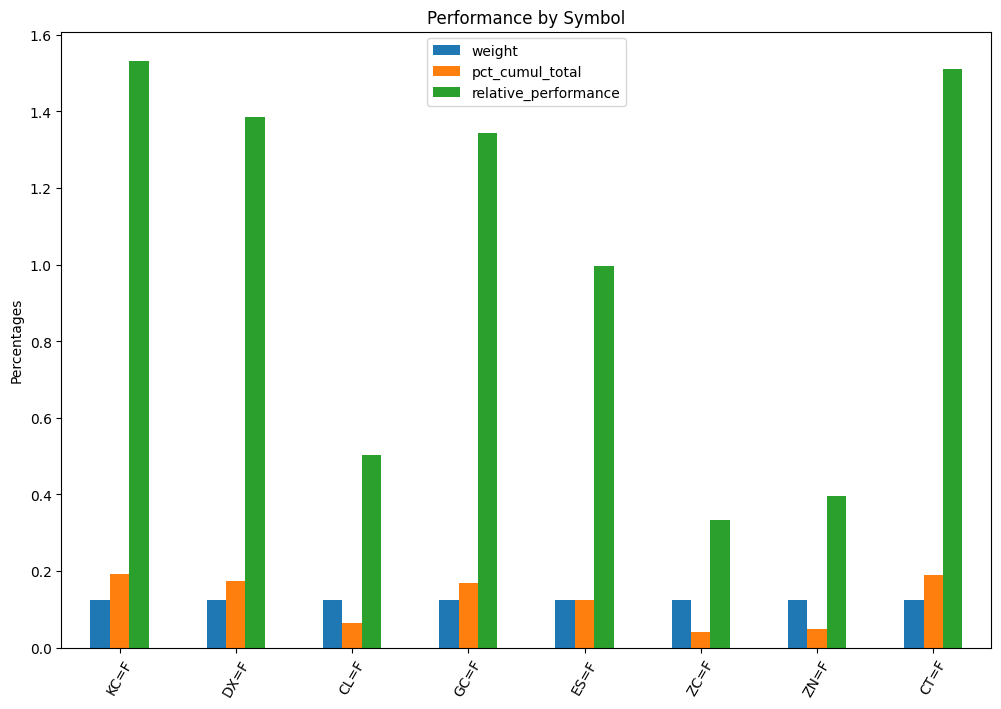

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,KC=F,DX=F,CL=F,GC=F,ES=F,ZC=F,ZN=F,CT=F
KC=F,1.00,-0.15,0.15,0.14,0.10,0.16,-0.04,0.15
DX=F,-0.15,1.00,-0.18,-0.42,-0.12,-0.14,-0.16,-0.15
CL=F,0.15,-0.18,1.00,0.19,0.22,0.21,-0.15,0.17
GC=F,0.14,-0.42,0.19,1.00,-0.02,0.15,0.18,0.11
ES=F,0.10,-0.12,0.22,-0.02,1.00,0.10,-0.28,0.16
ZC=F,0.16,-0.14,0.21,0.15,0.10,1.00,-0.05,0.19
ZN=F,-0.04,-0.16,-0.15,0.18,-0.28,-0.05,1.00,-0.09
CT=F,0.15,-0.15,0.17,0.11,0.16,0.19,-0.09,1.00


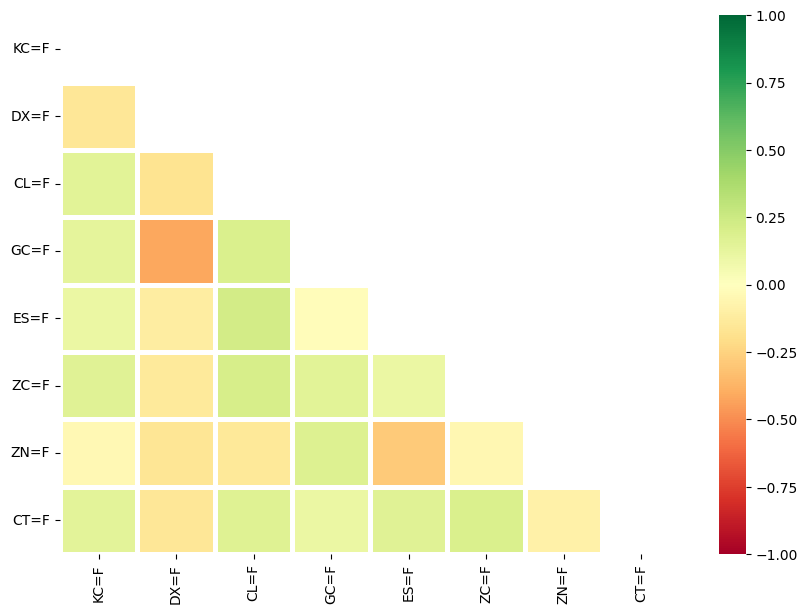

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

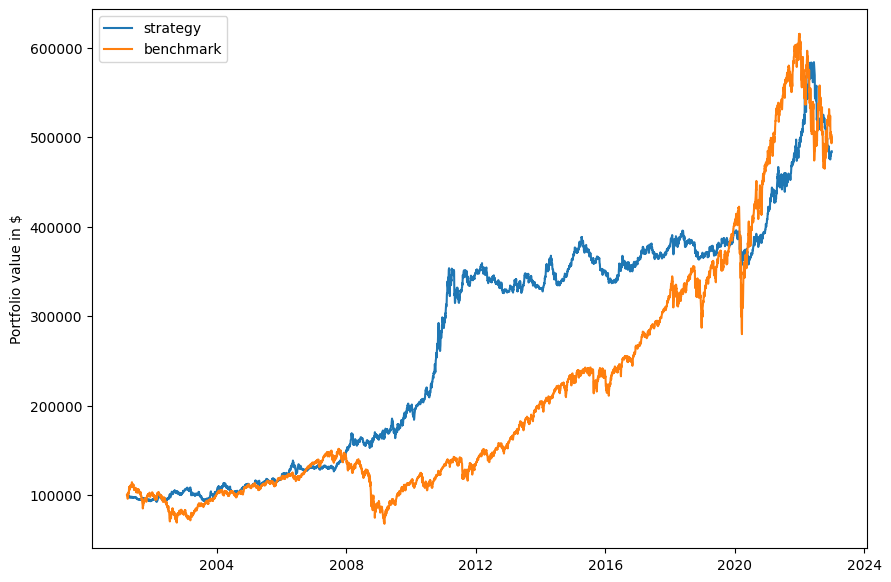

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.52,7.70
max_closed_out_drawdown,-18.62,-55.19
annualized_return_over_max_drawdown,0.40,0.14
best_month,15.93,23.62
worst_month,-10.30,-30.99
sharpe_ratio,0.78,0.48
sortino_ratio,1.07,0.60
monthly_std,2.85,4.69
annual_std,13.59,16.90


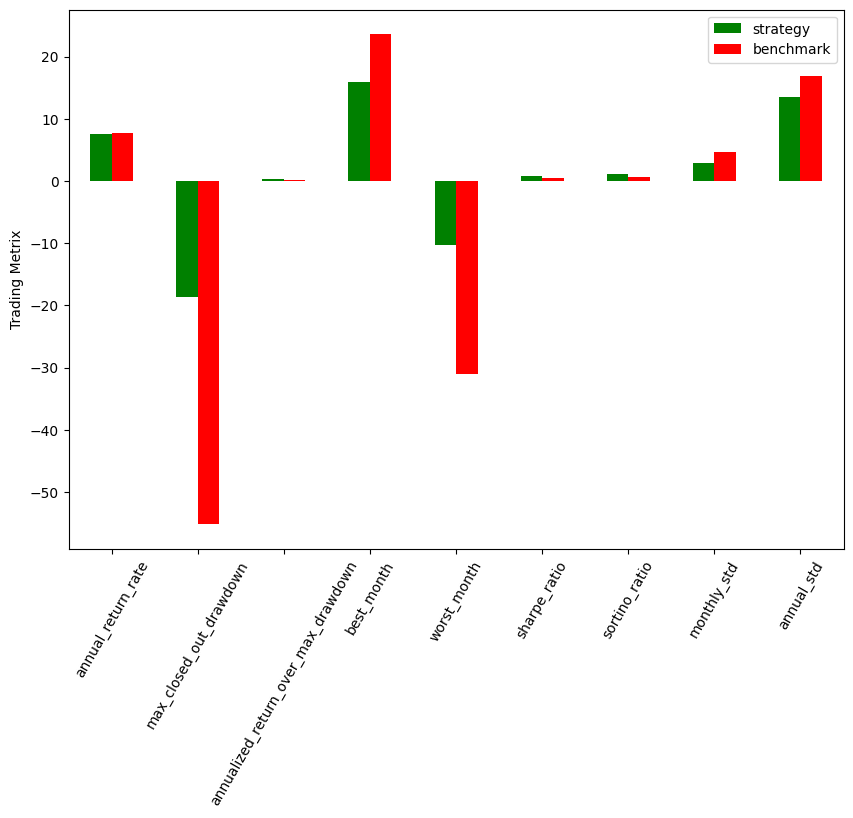

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.78
sharpe_ratio_max        0.83
sharpe_ratio_min        0.74
strategy risk           0.14
instrument risk         0.17
optimal target risk     0.78
half kelly criterion    0.39
aggressive leverage     4.63
moderate leverage       2.32
conservative leverage   2.18
dtype: float64